# Análisis Exploratorio de Datos (EDA) - Mantenimiento Predictivo

Este notebook realiza un análisis exploratorio completo de los datos de la tabla `faliure_probability_base` para entender:

1. **Estructura del dataset**: Tipos de datos, valores faltantes, estadísticas descriptivas
2. **Distribución de variables**: Análisis univariado de cada característica
3. **Variable objetivo**: Análisis de `faliure` (falla en próximos 7 días)
4. **Relación con el target**: Correlación y relación de cada variable con `faliure`
5. **Patrones temporales**: Análisis de tendencias en el tiempo

**Datos:** Tabla `faliure_probability_base` con granularidad diaria.

## 1. Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from mysql.connector import Error
from scipy import stats
#import Jinja2
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 2. Carga de Datos

In [2]:
# Configuración de la base de datos (misma que 02_modelos_clasificacion.ipynb)
DB_CONFIG = {
    'host': '127.0.0.1',
    'database': 'palantir_maintenance',
    'user': 'root',
    'password': 'admin',
    'port': 3306
}

def cargar_datos():
    """Cargar datos de la tabla faliure_probability_base"""
    try:
        connection = mysql.connector.connect(**DB_CONFIG)
        if connection.is_connected():
            query = """
            SELECT * 
            FROM faliure_probability_base
            ORDER BY asset_id, reading_date
            """
            df = pd.read_sql(query, connection)
            connection.close()
            return df
    except Error as e:
        print(f"Error al conectar: {e}")
        return None

# Cargar datos
df = cargar_datos()
if df is not None:
    print(f"✅ Datos cargados exitosamente")
    print(f"   Filas: {df.shape[0]:,}")
    print(f"   Columnas: {df.shape[1]}")
else:
    print("❌ No se pudieron cargar los datos")

✅ Datos cargados exitosamente
   Filas: 3,168
   Columnas: 17


## 3. Visión General del Dataset

In [3]:
# Primeras filas
print("Primeras 5 filas del dataset:")
display(df.head())

Primeras 5 filas del dataset:


,base_id,asset_id,reading_date,faliure,extraction_date,mechanical_vibration,rpm,power,electrical_current,pressure,flow,asset_service_days,asset_service_hours,days_since_last_failure,days_since_last_inspection,created_at,updated_at
0,2,1,2022-01-01,0,2026-02-17 11:40:44,1.7472,1494.31,17.0834,23.0506,4.3630,94.7888,717,17208.0,NaN,24,2026-02-17 11:40:44,2026-02-17 11:40:44
1,10,1,2022-01-02,0,2026-02-17 11:40:44,1.6793,1500.14,16.9940,23.2791,4.3455,95.2549,718,17232.0,NaN,25,2026-02-17 11:40:44,2026-02-17 11:40:44
2,18,1,2022-01-03,0,2026-02-17 11:40:44,1.7408,1499.24,16.9885,23.3505,4.3341,95.2336,719,17256.0,NaN,26,2026-02-17 11:40:44,2026-02-17 11:40:44
3,26,1,2022-01-04,0,2026-02-17 11:40:44,1.7035,1497.15,17.0526,23.3567,4.3286,95.2968,720,17280.0,NaN,27,2026-02-17 11:40:44,2026-02-17 11:40:44
4,34,1,2022-01-05,0,2026-02-17 11:40:44,1.7075,1495.86,17.0327,23.3497,4.3303,95.1304,721,17304.0,NaN,28,2026-02-17 11:40:44,2026-02-17 11:40:44


In [4]:
# Información del dataset
print("\nInformación del dataset:")
print("="*60)
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   base_id                     3168 non-null   int64         
 1   asset_id                    3168 non-null   int64         
 2   reading_date                3168 non-null   object        
 3   faliure                     3168 non-null   int64         
 4   extraction_date             3168 non-null   datetime64[ns]
 5   mechanical_vibration        3160 non-null   float64       
 6   rpm                         3160 non-null   float64       
 7   power                       3160 non-null   float64       
 8   electrical_current          3160 non-null   float64       
 9   pressure                    3160 non-null   float64       
 10  flow                        3160 non-null   float64       
 11  asset_service_days          31

In [5]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe().T.round(2))


Estadísticas descriptivas:


,count,mean,min,25%,50%,75%,max,std
base_id,3168.0,1584.5,1.0,792.75,1584.5,2376.25,3168.0,914.667153
asset_id,3168.0,4.5,1.0,2.75,4.5,6.25,8.0,2.29165
faliure,3168.0,0.05303,0.0,0.0,0.0,0.0,1.0,0.224129
extraction_date,3168,2026-02-17 11:40:44.773673984,2026-02-17 11:40:44,2026-02-17 11:40:45,2026-02-17 11:40:45,2026-02-17 11:40:45,2026-02-17 11:40:45,NaN
mechanical_vibration,3160.0,2.438971,1.5571,2.055025,2.48585,2.8823,3.4462,0.471423
rpm,3160.0,1676.301063,1494.31,1582.445,1677.28,1768.795,1859.26,114.823981
power,3160.0,17.535898,12.3559,14.8651,17.0118,20.051625,23.9784,3.332516
electrical_current,3160.0,29.062548,23.0506,26.19915,29.3523,32.41765,36.2968,3.52915
pressure,3160.0,2.368972,0.0,0.0,2.106,4.68825,5.2271,2.381344
flow,3160.0,58.568113,0.0,0.0,46.69825,115.25785,141.1112,59.766895


In [6]:
# Valores faltantes
print("\nAnálisis de valores faltantes:")
print("="*60)
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Valores Faltantes': missing,
    'Porcentaje (%)': missing_pct
})
missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)
if len(missing_df) > 0:
    display(missing_df)
else:
    print("✅ No hay valores faltantes en el dataset")


Análisis de valores faltantes:


,Valores Faltantes,Porcentaje (%)
days_since_last_failure,484,15.28
mechanical_vibration,8,0.25
rpm,8,0.25
power,8,0.25
electrical_current,8,0.25
pressure,8,0.25
flow,8,0.25


In [7]:
# Tipos de columnas
print("\nTipos de columnas:")
print("="*60)
print(f"\nNuméricas: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"Categóricas: {len(df.select_dtypes(include=['object']).columns)}")
print(f"Fechas: {len(df.select_dtypes(include=['datetime64']).columns)}")

print("\nColumnas por tipo:")
for dtype in df.dtypes.unique():
    cols = df.select_dtypes(include=[dtype]).columns.tolist()
    print(f"  {dtype}: {cols[:5]}{'...' if len(cols) > 5 else ''}")


Tipos de columnas:

Numéricas: 13
Categóricas: 1
Fechas: 3

Columnas por tipo:
  int64: ['base_id', 'asset_id', 'faliure', 'asset_service_days', 'days_since_last_inspection']
  object: ['reading_date']
  datetime64[ns]: ['extraction_date', 'created_at', 'updated_at']
  float64: ['mechanical_vibration', 'rpm', 'power', 'electrical_current', 'pressure']...


## 4. Análisis de la Variable Objetivo (`faliure`)

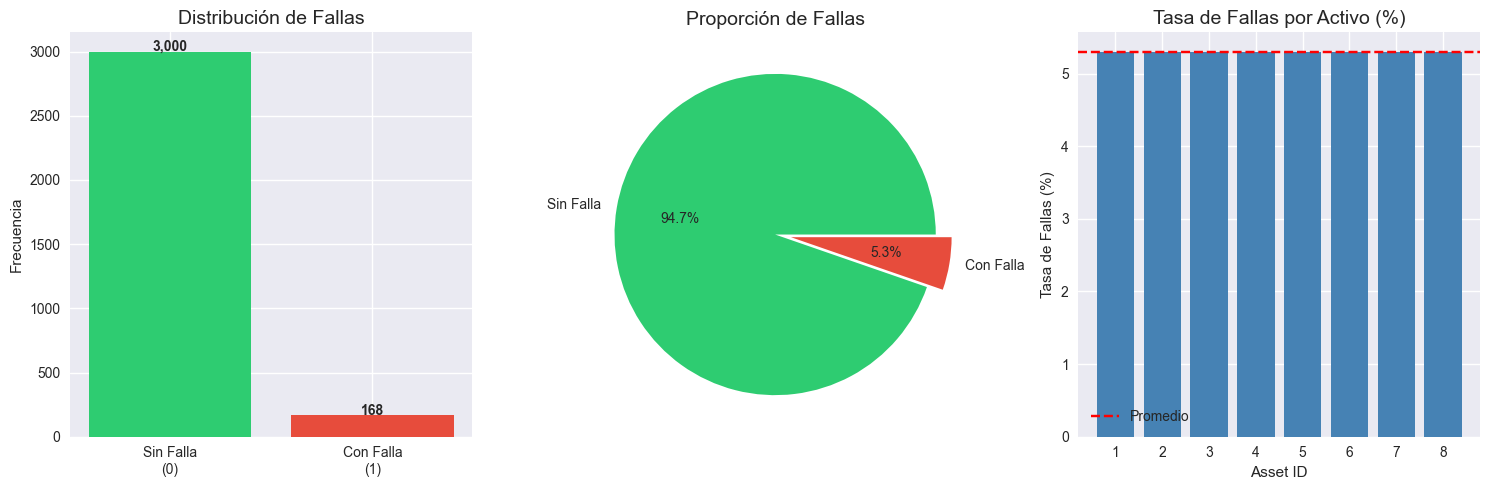

In [8]:
if 'faliure' in df.columns:
    faliure_counts = df['faliure'].value_counts()
    # Visualización
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Gráfico de barras
    colors = ['#2ecc71', '#e74c3c']
    axes[0].bar(['Sin Falla\n(0)', 'Con Falla\n(1)'], faliure_counts.values, color=colors)
    axes[0].set_title('Distribución de Fallas', fontsize=14)
    axes[0].set_ylabel('Frecuencia')
    for i, v in enumerate(faliure_counts.values):
        axes[0].text(i, v + 5, f'{v:,}', ha='center', fontweight='bold')
    
    # Gráfico de pie
    axes[1].pie(faliure_counts.values, labels=['Sin Falla', 'Con Falla'], 
                autopct='%1.1f%%', colors=colors, explode=(0, 0.1))
    axes[1].set_title('Proporción de Fallas', fontsize=14)
    
    # Fallas por activo
    fallas_por_activo = df.groupby('asset_id')['faliure'].mean() * 100
    axes[2].bar(fallas_por_activo.index, fallas_por_activo.values, color='steelblue')
    axes[2].set_title('Tasa de Fallas por Activo (%)', fontsize=14)
    axes[2].set_xlabel('Asset ID')
    axes[2].set_ylabel('Tasa de Fallas (%)')
    axes[2].axhline(y=df['faliure'].mean()*100, color='red', linestyle='--', label='Promedio')
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("❌ Columna 'faliure' no encontrada")

In [9]:
# Análisis de la variable objetivo 'faliure' (texto con fondo negro y letras blancas)
from IPython.display import display, HTML
if 'faliure' in df.columns:
    faliure_counts = df['faliure'].value_counts()
    faliure_pct = df['faliure'].value_counts(normalize=True) * 100
    ratio = faliure_counts[0] / faliure_counts[1] if faliure_counts[1] > 0 else 0
    sep = '=' * 60
    text = f"""Análisis de la variable objetivo 'faliure':
{sep}

Distribución:
  Sin Falla (0): {faliure_counts.get(0, 0):,} ({faliure_pct.get(0, 0):.2f}%)
  Con Falla (1): {faliure_counts.get(1, 0):,} ({faliure_pct.get(1, 0):.2f}%)

  Ratio de desbalance: {ratio:.1f}:1"""
    display(HTML(f'<pre style="background-color:#000; color:#fff; padding:1em; font-family:monospace; border-radius:8px;">{text}</pre>'))
else:
    display(HTML('<pre style="background-color:#000; color:#fff; padding:1em;">❌ Columna \'faliure\' no encontrada</pre>'))

## 5. Clasificación de Variables

Organizamos las variables por categorías para un análisis más estructurado:

In [10]:
# Clasificar variables por categoría
id_cols = ['base_id', 'asset_id']
date_cols = ['reading_date', 'extraction_date', 'created_at', 'updated_at']
target_col = ['faliure']
status_cols = ['asset_status']

# Variables numéricas por grupo
# Feature groups for faliure_probability_base (mechanical vibration, RPM, power, current, pressure, flow, service, days since failure/inspection)
sensor_operating_cols = [col for col in df.columns if col in ['mechanical_vibration', 'rpm', 'power', 'electrical_current', 'pressure', 'flow']]
service_cols = [col for col in df.columns if col in ['asset_service_days', 'asset_service_hours']]
days_since_cols = [col for col in df.columns if col in ['days_since_last_failure', 'days_since_last_inspection']]
days_since_cols = [col for col in df.columns if col in ['days_since_last_failure', 'days_since_last_inspection']]

print("Clasificación de Variables:")
print("="*60)
print(f"\n📌 Identificadores: {id_cols}")
print(f"\n📅 Fechas: {date_cols}")
print(f"\n🎯 Variable Objetivo: {target_col}")
print(f"\n📊 Sensores/Operación ({len(sensor_operating_cols)}): {sensor_operating_cols}")
print(f"\n📅 Servicio del activo ({len(service_cols)}): {service_cols}")
print(f"\n⏱️ Días desde falla/inspección ({len(days_since_cols)}): {days_since_cols}")

Clasificación de Variables:

📌 Identificadores: ['base_id', 'asset_id']

📅 Fechas: ['reading_date', 'extraction_date', 'created_at', 'updated_at']

🎯 Variable Objetivo: ['faliure']

📊 Sensores/Operación (6): ['mechanical_vibration', 'rpm', 'power', 'electrical_current', 'pressure', 'flow']

📅 Servicio del activo (2): ['asset_service_days', 'asset_service_hours']

⏱️ Días desde falla/inspección (2): ['days_since_last_failure', 'days_since_last_inspection']


## 6. Distribución de Variables Numéricas

In [11]:
# Seleccionar columnas numéricas (excluyendo IDs y target)
exclude_cols = id_cols + target_col + ['extraction_date', 'created_at', 'updated_at']
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                if col not in exclude_cols]

print(f"Variables numéricas a analizar: {len(numeric_cols)}")
print(numeric_cols)

Variables numéricas a analizar: 10
['mechanical_vibration', 'rpm', 'power', 'electrical_current', 'pressure', 'flow', 'asset_service_days', 'asset_service_hours', 'days_since_last_failure', 'days_since_last_inspection']


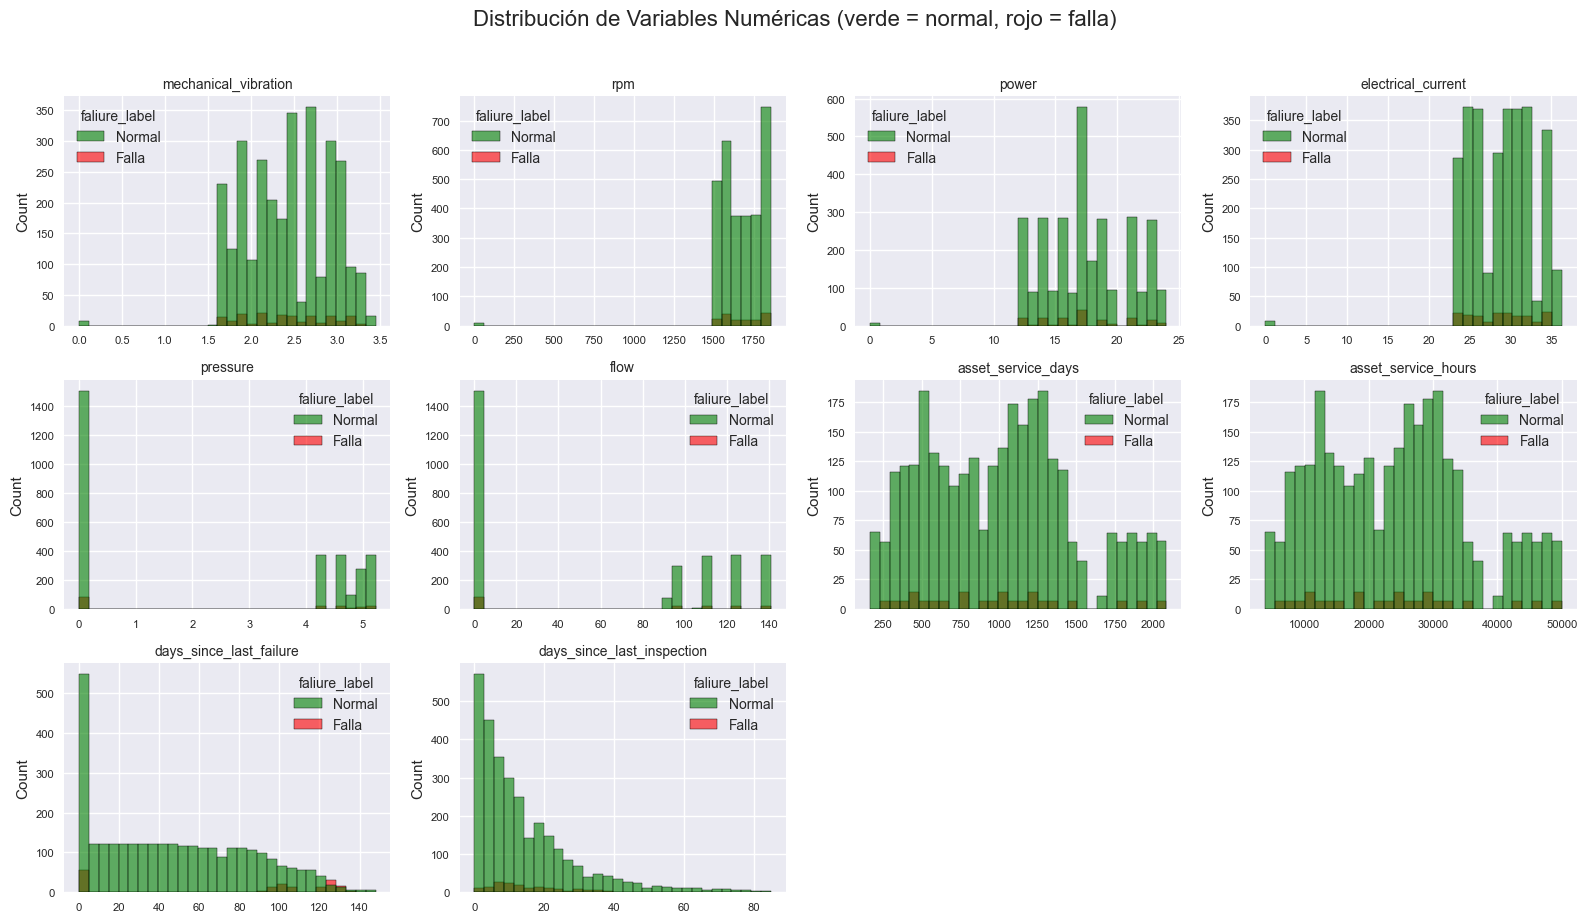

In [12]:
# Histogramas de todas las variables numéricas (rojo = falla, verde = normalidad)
# Crear columna de etiqueta para el hue
df_hist = df.copy()
df_hist['faliure_label'] = df_hist['faliure'].map({0: 'Normal', 1: 'Falla'})
palette_hist = {'Normal': 'green', 'Falla': 'red'}

n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    plot_df = df_hist.assign(_x=df_hist[col].fillna(0))
    sns.histplot(data=plot_df, x='_x', hue='faliure_label', ax=axes[i],
                 bins=30, palette=palette_hist, alpha=0.6, edgecolor='black', kde=False)
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(labelsize=8)
    axes[i].set_xlabel('')

# Ocultar ejes vacíos
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribución de Variables Numéricas (verde = normal, rojo = falla)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 6.1 Distribución de variables numéricas: 3 días antes y 3 días después de cada falla por asset

Tabla de media de variables numéricas en la ventana **3 días antes** y **3 días después** de cada fecha de falla, por activo (rojo = 3d antes, verde = 3d después). Gráficos de evolución temporal: línea verde = normal, puntos rojos = falla.

In [13]:
import sys
print(sys.executable)

c:\Users\carlo\Documents\21.- MTTOIA\Palantir\palantir_venv\Scripts\python.exe


In [14]:
import sys
!"{sys.executable}" -m pip install jinja2
#!pip install jinja2

In [15]:
df[df['faliure']==1].sort_values(by="reading_date", ascending=False, na_position="first")

,base_id,asset_id,reading_date,faliure,extraction_date,mechanical_vibration,rpm,power,electrical_current,pressure,flow,asset_service_days,asset_service_hours,days_since_last_failure,days_since_last_inspection,created_at,updated_at
3116,2760,8,2022-12-11,1,2026-02-17 11:40:45,3.2176,1851.78,17.4115,34.8680,0.0,0.0,2033,48792.0,125.0,20,2026-02-17 11:40:45,2026-02-17 11:40:45
3115,2752,8,2022-12-10,1,2026-02-17 11:40:45,3.1731,1850.38,17.2396,34.4472,0.0,0.0,2032,48768.0,124.0,19,2026-02-17 11:40:45,2026-02-17 11:40:45
3114,2744,8,2022-12-09,1,2026-02-17 11:40:45,3.1367,1849.94,17.1106,34.1755,0.0,0.0,2031,48744.0,123.0,18,2026-02-17 11:40:45,2026-02-17 11:40:45
3113,2736,8,2022-12-08,1,2026-02-17 11:40:45,3.1265,1850.12,17.0370,34.0264,0.0,0.0,2030,48720.0,122.0,17,2026-02-17 11:40:45,2026-02-17 11:40:45
3112,2728,8,2022-12-07,1,2026-02-17 11:40:45,3.1212,1849.96,17.0329,34.0477,0.0,0.0,2029,48696.0,121.0,16,2026-02-17 11:40:45,2026-02-17 11:40:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,71,7,2022-01-09,1,2026-02-17 11:40:44,3.0194,1801.63,15.5777,32.9632,0.0,0.0,1046,25104.0,NaN,39,2026-02-17 11:40:44,2026-02-17 11:40:44
2383,63,7,2022-01-08,1,2026-02-17 11:40:44,2.9333,1798.31,15.3958,32.4445,0.0,0.0,1045,25080.0,NaN,38,2026-02-17 11:40:44,2026-02-17 11:40:44
2382,55,7,2022-01-07,1,2026-02-17 11:40:44,2.9386,1797.65,15.4002,32.3884,0.0,0.0,1044,25056.0,NaN,37,2026-02-17 11:40:44,2026-02-17 11:40:44
2381,47,7,2022-01-06,1,2026-02-17 11:40:44,2.9567,1798.70,15.3688,32.3134,0.0,0.0,1043,25032.0,NaN,36,2026-02-17 11:40:44,2026-02-17 11:40:44


,asset_id,ventana,faliure_label,mechanical_vibration,rpm,power,electrical_current,pressure,flow,asset_service_days,asset_service_hours,days_since_last_failure,days_since_last_inspection
0,1,3d_antes,Falla (3d antes),1.704433,1499.133333,17.018800,23.381267,4.287500,94.935933,752.000000,18048.000000,nan,18.000000
1,1,3d_despues,Normal (3d después),1.710467,1499.040000,17.014900,23.377867,4.292467,94.927033,756.000000,18144.000000,nan,22.000000
2,1,3d_antes,Falla (3d antes),1.703400,1499.106667,17.019733,23.380167,4.287467,94.944267,753.000000,18072.000000,nan,19.000000
3,1,3d_despues,Normal (3d después),1.711333,1499.313333,17.047400,23.411233,4.293600,94.856867,757.000000,18168.000000,nan,23.000000
4,1,3d_antes,Falla (3d antes),1.706167,1499.013333,17.018267,23.378933,4.288633,94.954400,754.000000,18096.000000,nan,20.000000
5,1,3d_despues,Normal (3d después),1.720800,1500.063333,17.121433,23.506100,4.291067,94.718700,758.000000,18192.000000,nan,24.000000
6,1,3d_antes,Falla (3d antes),1.708833,1499.006667,17.017400,23.376567,4.290000,94.932033,755.000000,18120.000000,nan,21.000000
7,1,3d_despues,Normal (3d después),1.743533,1501.216667,17.258700,23.702133,4.282433,94.513133,759.000000,18216.000000,nan,25.000000
8,1,3d_antes,Falla (3d antes),1.710467,1499.040000,17.014900,23.377867,4.292467,94.927033,756.000000,18144.000000,nan,22.000000
9,1,3d_despues,Normal (3d después),1.778367,1503.100000,17.446700,24.022933,4.271833,94.214700,760.000000,18240.000000,0.000000,26.000000


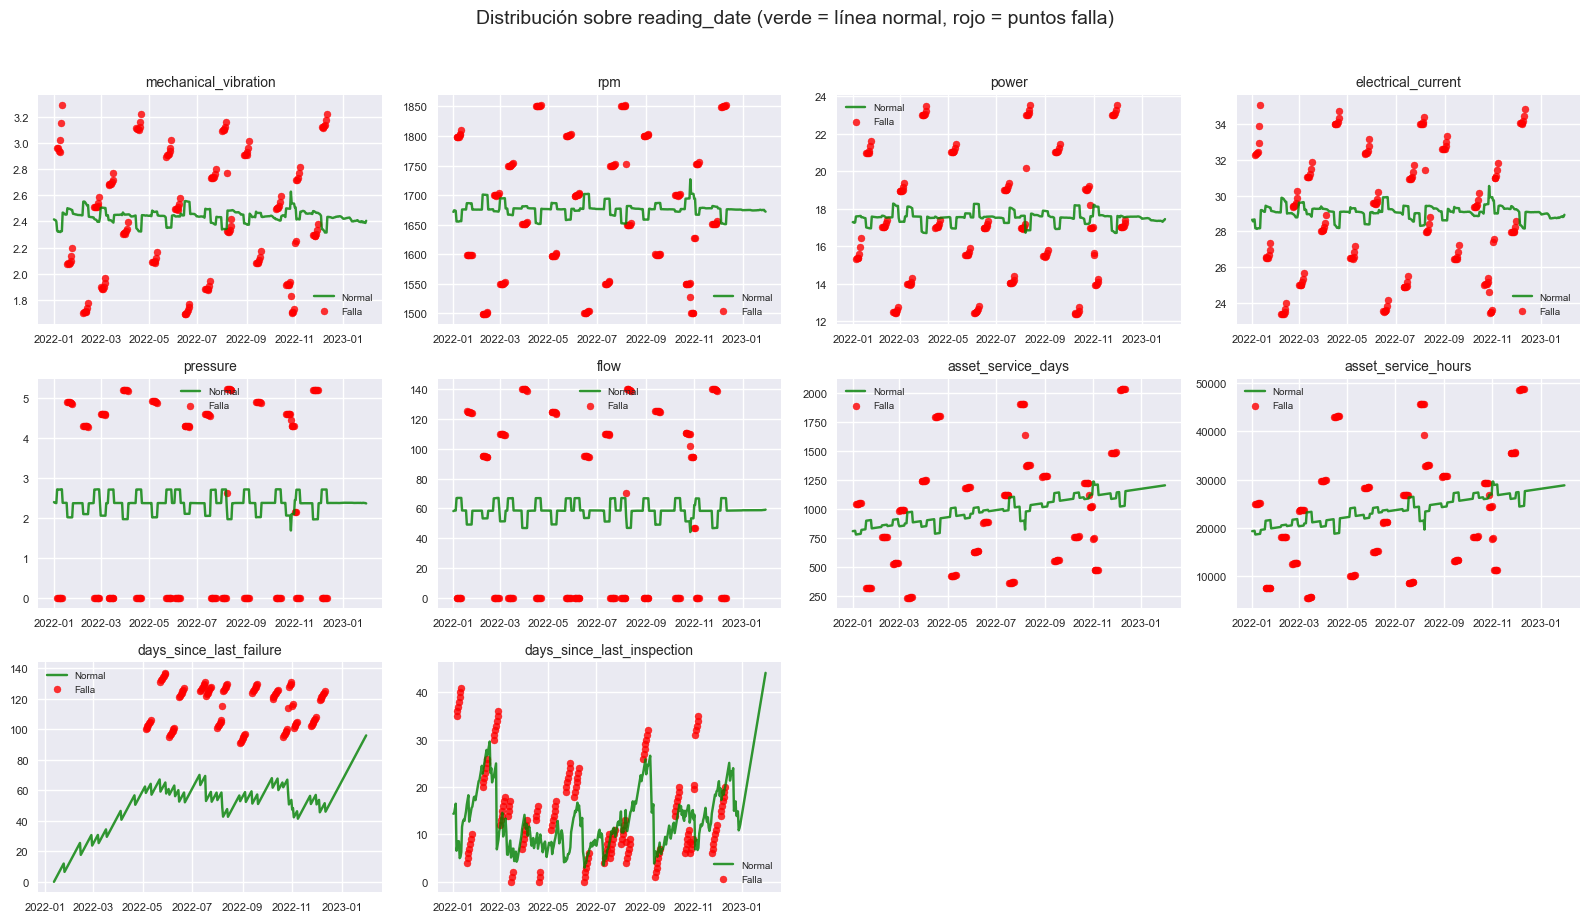

In [16]:
# Tabla: Media de variables numéricas 3 días antes y 3 días después de cada falla, por asset (rojo = falla, verde = normal)
date_col = 'reading_date' if 'reading_date' in df.columns else 'extraction_date'
df_table = df.copy()
df_table[date_col] = pd.to_datetime(df_table[date_col])

# Obtener fechas de falla por asset (reading_date donde faliure==1)
failure_dates = df_table[df_table['faliure'] == 1].groupby('asset_id')[date_col].apply(lambda x: x.dt.normalize().unique()).explode().reset_index()
failure_dates.columns = ['asset_id', 'failure_date']
failure_dates['failure_date'] = pd.to_datetime(failure_dates['failure_date'])

rows_before_after = []
for _, row in failure_dates.iterrows():
    aid, fdate = row['asset_id'], row['failure_date']
    for window, delta_days, label in [('3d_antes', range(-3, 0), 'Falla (3d antes)'), ('3d_despues', range(1, 4), 'Normal (3d después)')]:
        dates = [fdate + pd.Timedelta(days=d) for d in delta_days]
        sub = df_table[(df_table['asset_id'] == aid) & (df_table[date_col].dt.normalize().isin(dates))]
        if len(sub) == 0:
            continue
        means = sub[numeric_cols].mean()
        means = means.to_dict()
        means['asset_id'] = aid
        means['ventana'] = window
        means['faliure_label'] = label
        rows_before_after.append(means)

if rows_before_after:
    dist_table = pd.DataFrame(rows_before_after)[['asset_id', 'ventana', 'faliure_label'] + numeric_cols]

    def style_failure_rows(row):
        if row['faliure_label'].startswith('Falla'):
            return ['background-color: rgba(255,0,0,0.25)'] * len(row)
        return ['background-color: rgba(0,128,0,0.25)'] * len(row)

    display(dist_table.style.apply(style_failure_rows, axis=1).set_caption('Media de variables numéricas: 3 días antes y 3 días después de cada falla por asset (verde = 3d después, rojo = 3d antes)'))
else:
    print("No hay fechas de falla (faliure=1) para construir la tabla 3d antes/después.")

# Gráficos de distribución sobre tiempo: evolución por variable, verde = línea (normal), rojo = puntos (falla)
if date_col in df.columns:
    df_time = df.copy()
    df_time[date_col] = pd.to_datetime(df_time[date_col])
    df_time['faliure_label'] = df_time['faliure'].map({0: 'Normal', 1: 'Falla'})
    agg_time = df_time.groupby([pd.Grouper(key=date_col, freq='D'), 'faliure_label'])[numeric_cols].mean().reset_index()
    n_plot_cols = min(4, len(numeric_cols))
    n_plot_rows = (len(numeric_cols) + n_plot_cols - 1) // n_plot_cols
    fig2, axes2 = plt.subplots(n_plot_rows, n_plot_cols, figsize=(16, 3*n_plot_rows))
    axes2 = axes2.flatten()
    for i, col in enumerate(numeric_cols):
        for label, color in [('Normal', 'green'), ('Falla', 'red')]:
            sub = agg_time[agg_time['faliure_label'] == label]
            if label == 'Falla':
                axes2[i].scatter(sub[date_col], sub[col], color=color, label=label, alpha=0.8, s=25)
            else:
                axes2[i].plot(sub[date_col], sub[col], color=color, label=label, alpha=0.8)
        axes2[i].set_title(col, fontsize=10)
        axes2[i].tick_params(labelsize=8)
        axes2[i].legend(loc='best', fontsize=7)
    for j in range(i+1, len(axes2)):
        axes2[j].set_visible(False)
    plt.suptitle(f'Distribución sobre {date_col} (verde = línea normal, rojo = puntos falla)', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

## 6.2 Evolución temporal por activo (una línea por asset)

Cada variable numérica en un gráfico de líneas sobre la fecha de lectura, con un color distinto por `asset_id`.

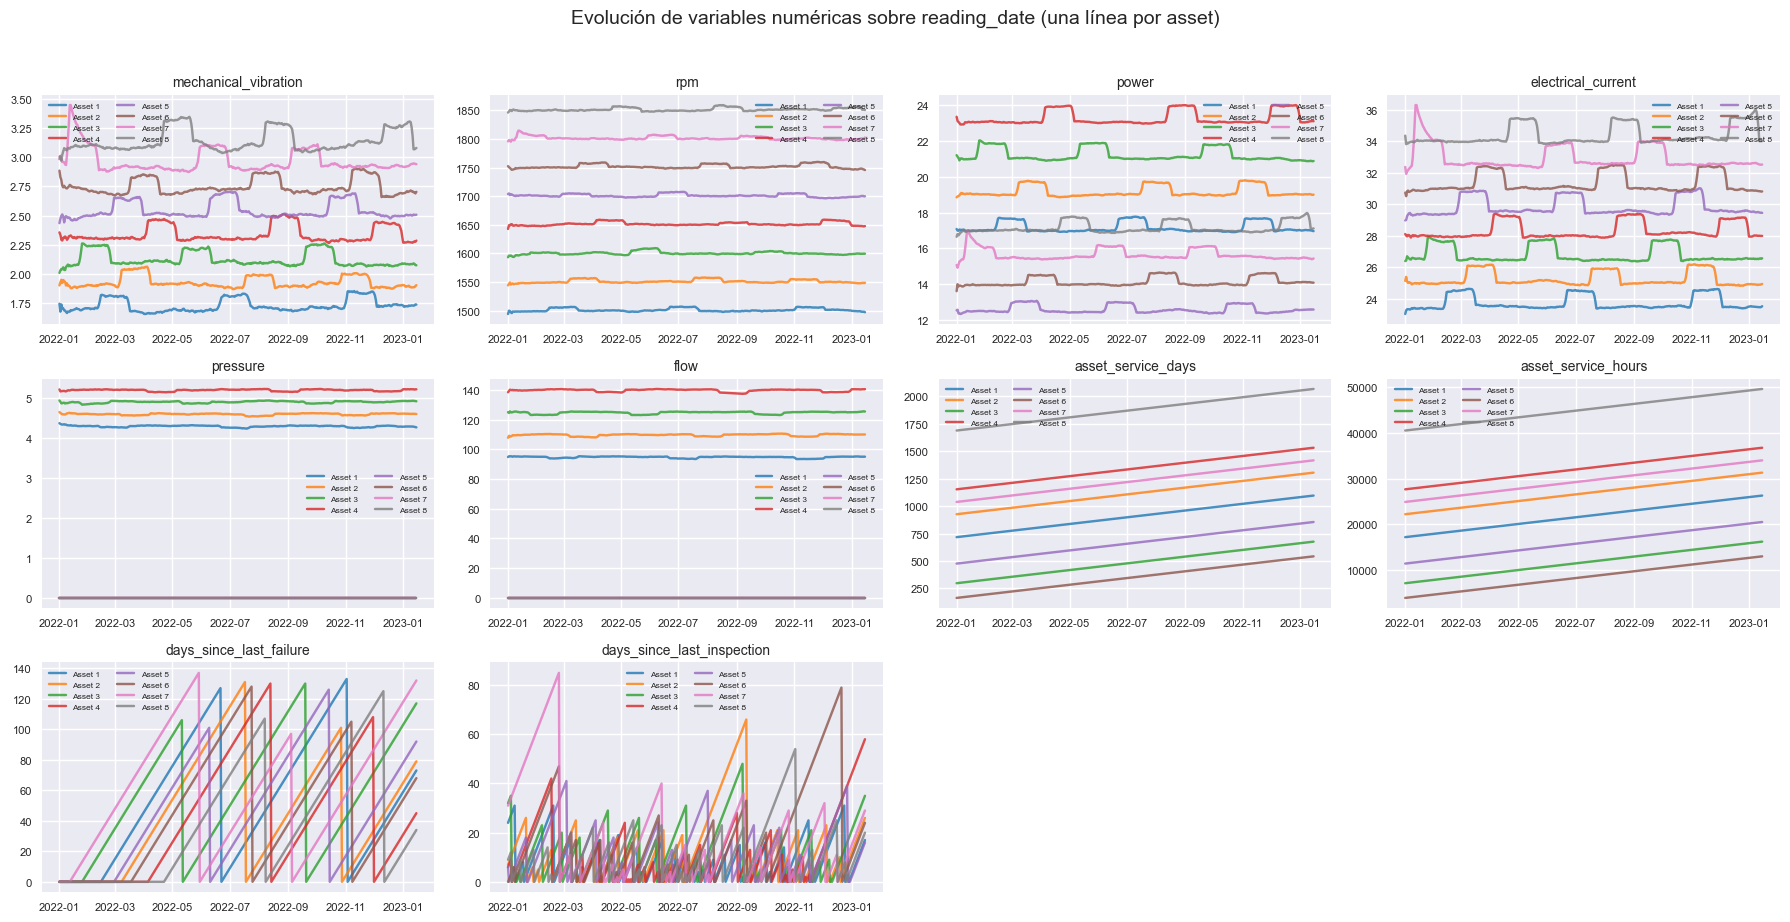

In [29]:
# Gráficos de línea: cada variable numérica sobre la fecha, una línea por asset_id (color por activo)
date_col = 'reading_date' if 'reading_date' in df.columns else 'extraction_date'
df_line = df.copy()
df_line[date_col] = pd.to_datetime(df_line[date_col])

df_line = df_line[df_line[date_col] <= '2023-01-15']

assets = sorted(df_line['asset_id'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, max(len(assets), 10)))
asset_color = {a: colors[i % len(colors)] for i, a in enumerate(assets)}

n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig3, axes3 = plt.subplots(n_rows, n_cols, figsize=(18, 3*n_rows))
axes3 = axes3.flatten()

for i, col in enumerate(numeric_cols):
    for asset_id in assets:
        sub = df_line[df_line['asset_id'] == asset_id].sort_values(date_col)
        axes3[i].plot(sub[date_col], sub[col].fillna(0), color=asset_color[asset_id], label=f'Asset {asset_id}', alpha=0.8)
    axes3[i].set_title(col, fontsize=10)
    axes3[i].tick_params(labelsize=8)
    axes3[i].legend(loc='best', fontsize=6, ncol=2)

for j in range(i+1, len(axes3)):
    axes3[j].set_visible(False)

plt.suptitle(f'Evolución de variables numéricas sobre {date_col} (una línea por asset)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 7. Análisis de Correlación con la Variable Objetivo

Correlación de variables con 'faliure':


,Variable,Correlación,Dirección
0,days_since_last_failure,0.334480,Positiva
1,days_since_last_inspection,0.013561,Positiva
2,asset_service_hours,-0.010239,Negativa
3,asset_service_days,-0.010239,Negativa
4,electrical_current,-0.009380,Negativa
5,mechanical_vibration,-0.005474,Negativa
6,power,-0.004577,Negativa
7,rpm,-0.001274,Negativa
8,flow,0.000264,Positiva
9,pressure,0.000135,Positiva


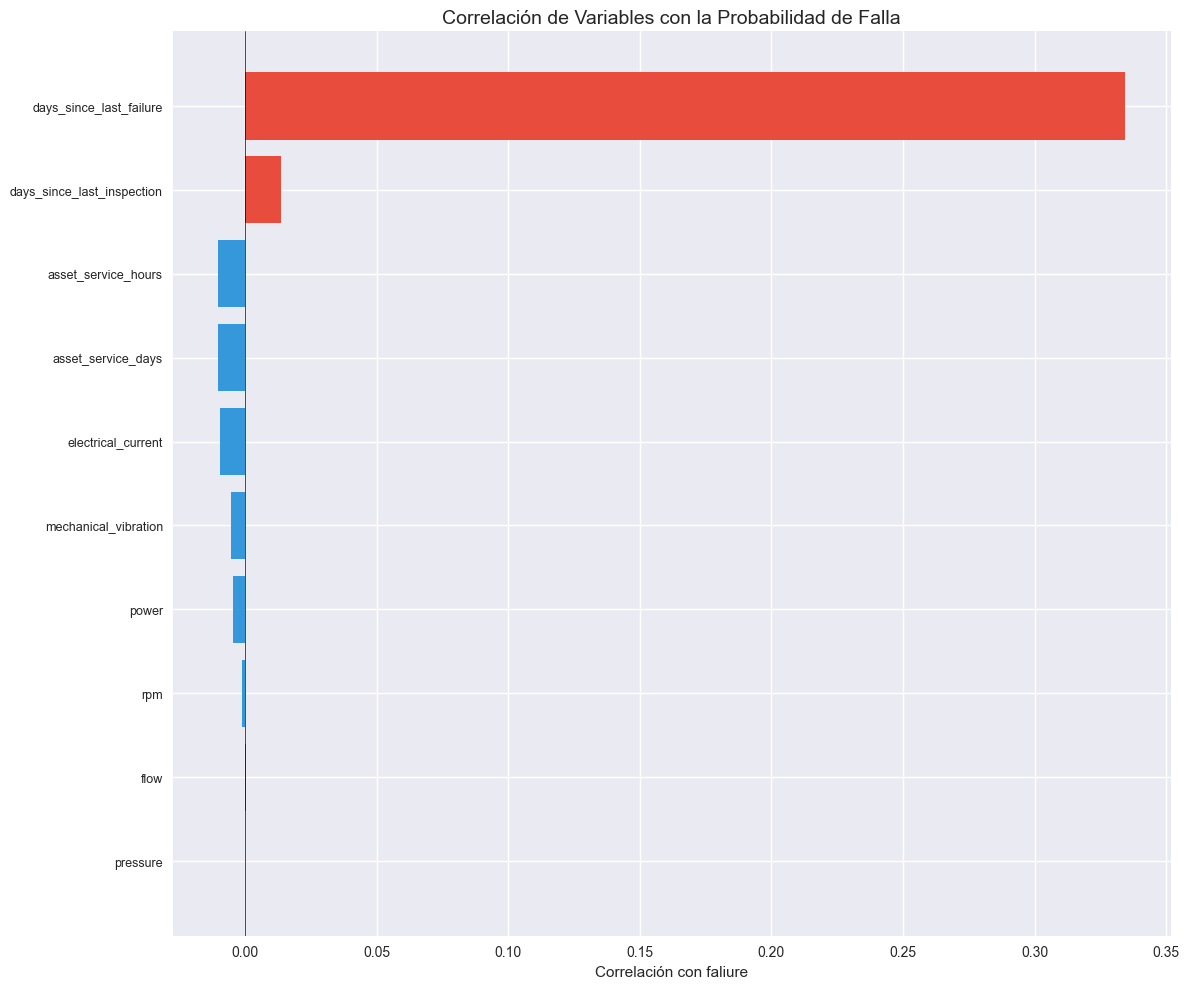

In [18]:
if 'faliure' in df.columns:
    # Calcular correlación con faliure
    correlations = df[numeric_cols + ['faliure']].corr()['faliure'].drop('faliure').sort_values(key=abs, ascending=False)
    
    print("Correlación de variables con 'faliure':")
    print("="*60)
    
    # Mostrar top correlaciones
    corr_df = pd.DataFrame({
        'Variable': correlations.index,
        'Correlación': correlations.values,
        'Dirección': ['Positiva' if x > 0 else 'Negativa' for x in correlations.values]
    })
    display(corr_df.head(15))
    
    # Visualización
    fig, ax = plt.subplots(figsize=(12, 10))
    colors = ['#e74c3c' if x > 0 else '#3498db' for x in correlations.values]
    ax.barh(range(len(correlations)), correlations.values, color=colors)
    ax.set_yticks(range(len(correlations)))
    ax.set_yticklabels(correlations.index, fontsize=9)
    ax.set_xlabel('Correlación con faliure')
    ax.set_title('Correlación de Variables con la Probabilidad de Falla', fontsize=14)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()

## 8. Variables Más Importantes para Predecir Fallas

In [19]:
# Top 10 variables más correlacionadas
top_10_vars = correlations.head(10).index.tolist()

print("Top 10 variables más correlacionadas con fallas:")
print("="*60)
for i, var in enumerate(top_10_vars, 1):
    corr_val = correlations[var]
    print(f"{i}. {var}: {corr_val:.4f}")

Top 10 variables más correlacionadas con fallas:
1. days_since_last_failure: 0.3345
2. days_since_last_inspection: 0.0136
3. asset_service_hours: -0.0102
4. asset_service_days: -0.0102
5. electrical_current: -0.0094
6. mechanical_vibration: -0.0055
7. power: -0.0046
8. rpm: -0.0013
9. flow: 0.0003
10. pressure: 0.0001


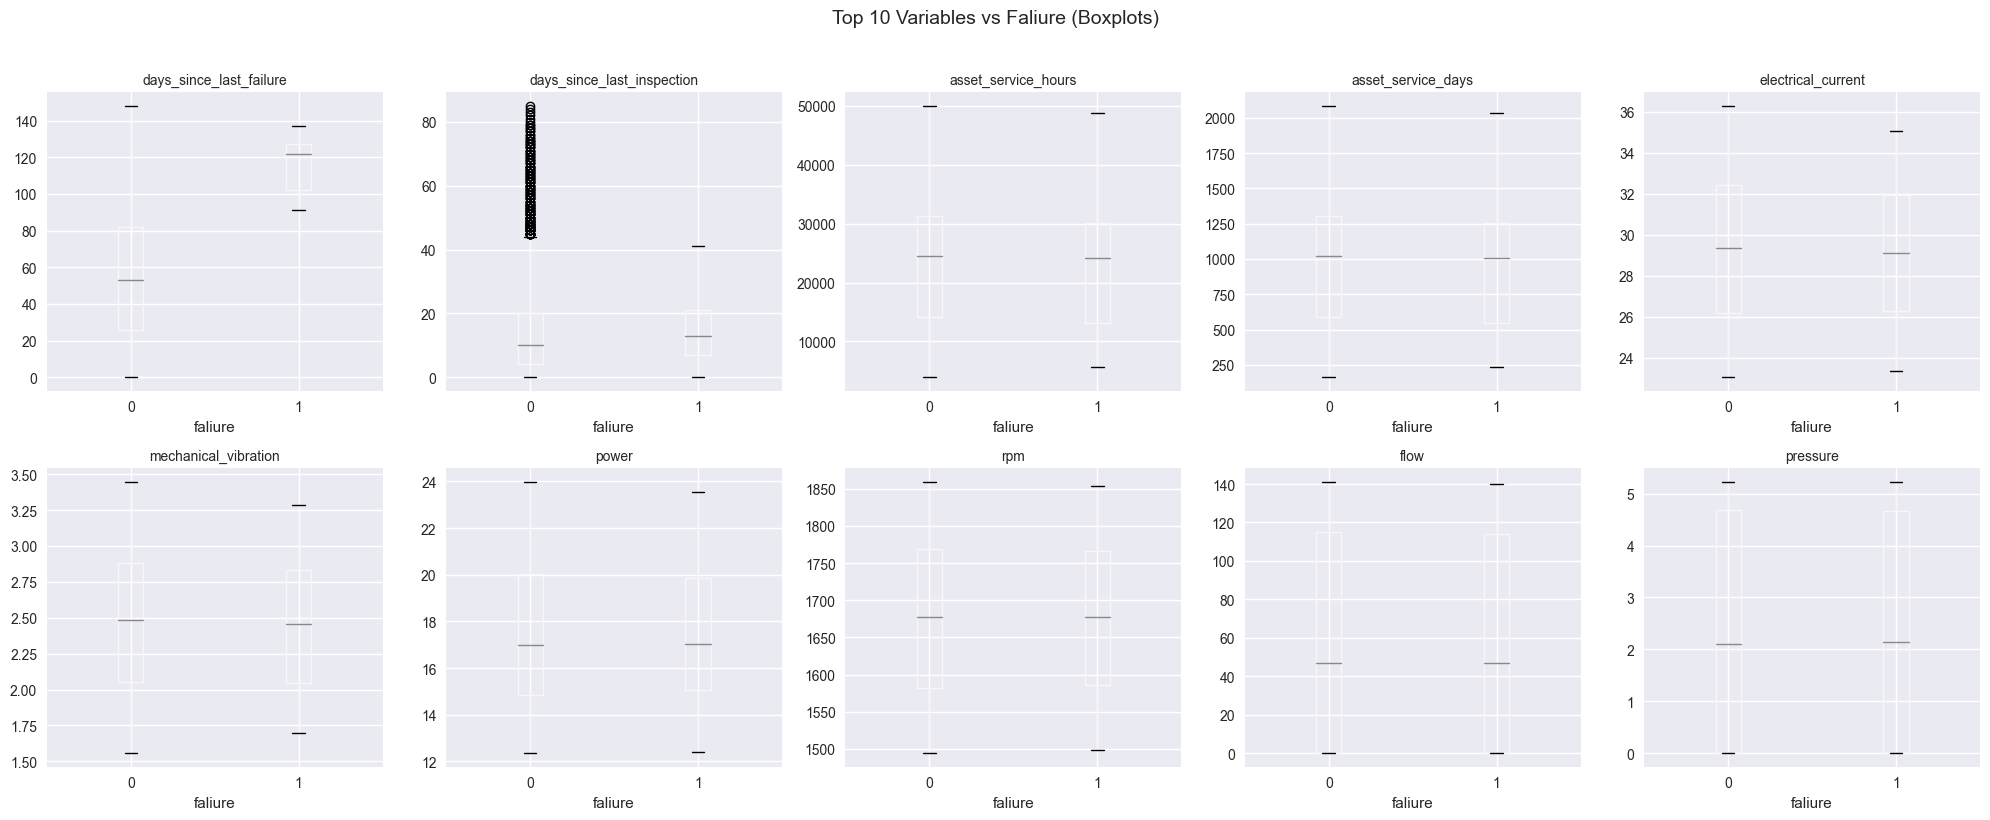

In [20]:
# Boxplots de las top 10 variables vs faliure
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(top_10_vars):
    df.boxplot(column=col, by='faliure', ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('faliure')
    axes[i].set_ylabel('')

plt.suptitle('Top 10 Variables vs Faliure (Boxplots)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 9. Análisis por Grupo de Variables

In [21]:
# Función para analizar un grupo de variables
def analizar_grupo(df, cols, grupo_nombre):
    if not cols:
        print(f"No hay variables en el grupo '{grupo_nombre}'")
        return
    
    print(f"\n{'='*60}")
    print(f"ANÁLISIS: {grupo_nombre}")
    print(f"{'='*60}")
    
    # Estadísticas
    stats_df = df[cols].describe().T
    display(stats_df.round(2))
    
    # Correlación con faliure
    if 'faliure' in df.columns:
        corrs = df[cols + ['faliure']].corr()['faliure'].drop('faliure')
        print(f"\nCorrelación con 'faliure':")
        for col in cols:
            print(f"  {col}: {corrs[col]:.4f}")

In [22]:
# Análisis de variables de sensores
analizar_grupo(df, sensor_operating_cols, 'Sensores y operación (vibración, RPM, potencia, corriente, presión, caudal)')


ANÁLISIS: Sensores y operación (vibración, RPM, potencia, corriente, presión, caudal)


,count,mean,std,min,25%,50%,75%,max
mechanical_vibration,3160.0,2.44,0.47,1.56,2.06,2.49,2.88,3.45
rpm,3160.0,1676.30,114.82,1494.31,1582.44,1677.28,1768.80,1859.26
power,3160.0,17.54,3.33,12.36,14.87,17.01,20.05,23.98
electrical_current,3160.0,29.06,3.53,23.05,26.20,29.35,32.42,36.30
pressure,3160.0,2.37,2.38,0.00,0.00,2.11,4.69,5.23
flow,3160.0,58.57,59.77,0.00,0.00,46.70,115.26,141.11



Correlación con 'faliure':
  mechanical_vibration: -0.0055
  rpm: -0.0013
  power: -0.0046
  electrical_current: -0.0094
  pressure: 0.0001
  flow: 0.0003


In [23]:
# Análisis de variables de fallas históricas
analizar_grupo(df, days_since_cols, 'Días desde última falla e inspección')


ANÁLISIS: Días desde última falla e inspección


,count,mean,std,min,25%,50%,75%,max
days_since_last_failure,2684.0,57.89,35.79,0.0,27.0,56.0,86.0,148.0
days_since_last_inspection,3168.0,14.21,14.52,0.0,4.0,10.0,20.0,85.0



Correlación con 'faliure':
  days_since_last_failure: 0.3345
  days_since_last_inspection: 0.0136


In [24]:
# Análisis de variables de tareas
analizar_grupo(df, service_cols, 'Días y horas de servicio del activo')


ANÁLISIS: Días y horas de servicio del activo


,count,mean,std,min,25%,50%,75%,max
asset_service_days,3168.0,1004.88,482.54,163.0,584.0,1019.0,1302.25,2084.0
asset_service_hours,3168.0,24117.00,11581.05,3912.0,14016.0,24456.0,31254.00,50016.0



Correlación con 'faliure':
  asset_service_days: -0.0102
  asset_service_hours: -0.0102


In [25]:
# Análisis de variables de órdenes


## 10. Mapa de Calor de Correlaciones

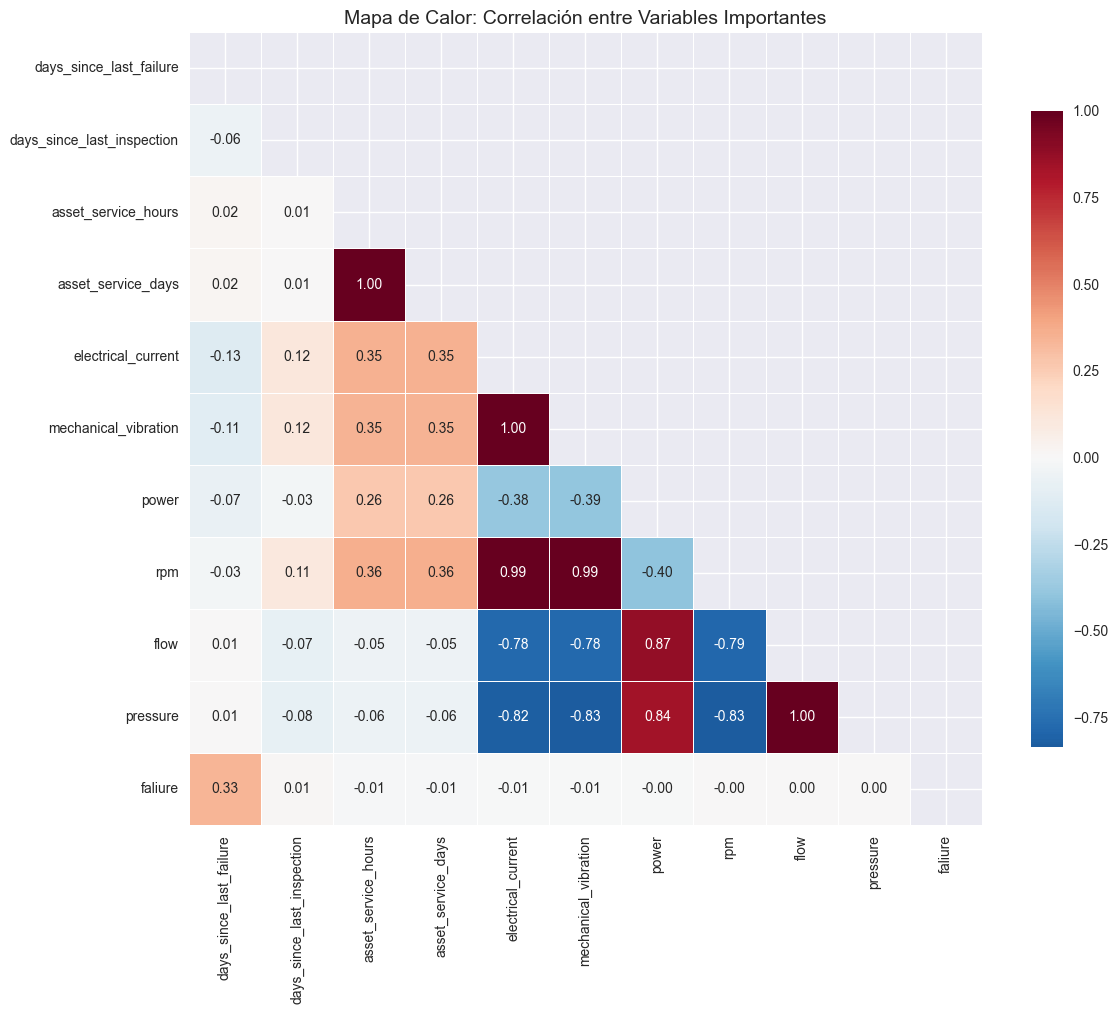

In [26]:
# Mapa de calor con las variables más importantes
important_vars = top_10_vars[:10] + ['faliure']
corr_matrix = df[important_vars].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdBu_r', center=0, square=True,
            linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Mapa de Calor: Correlación entre Variables Importantes', fontsize=14)
plt.tight_layout()
plt.show()

## 11. Análisis Temporal

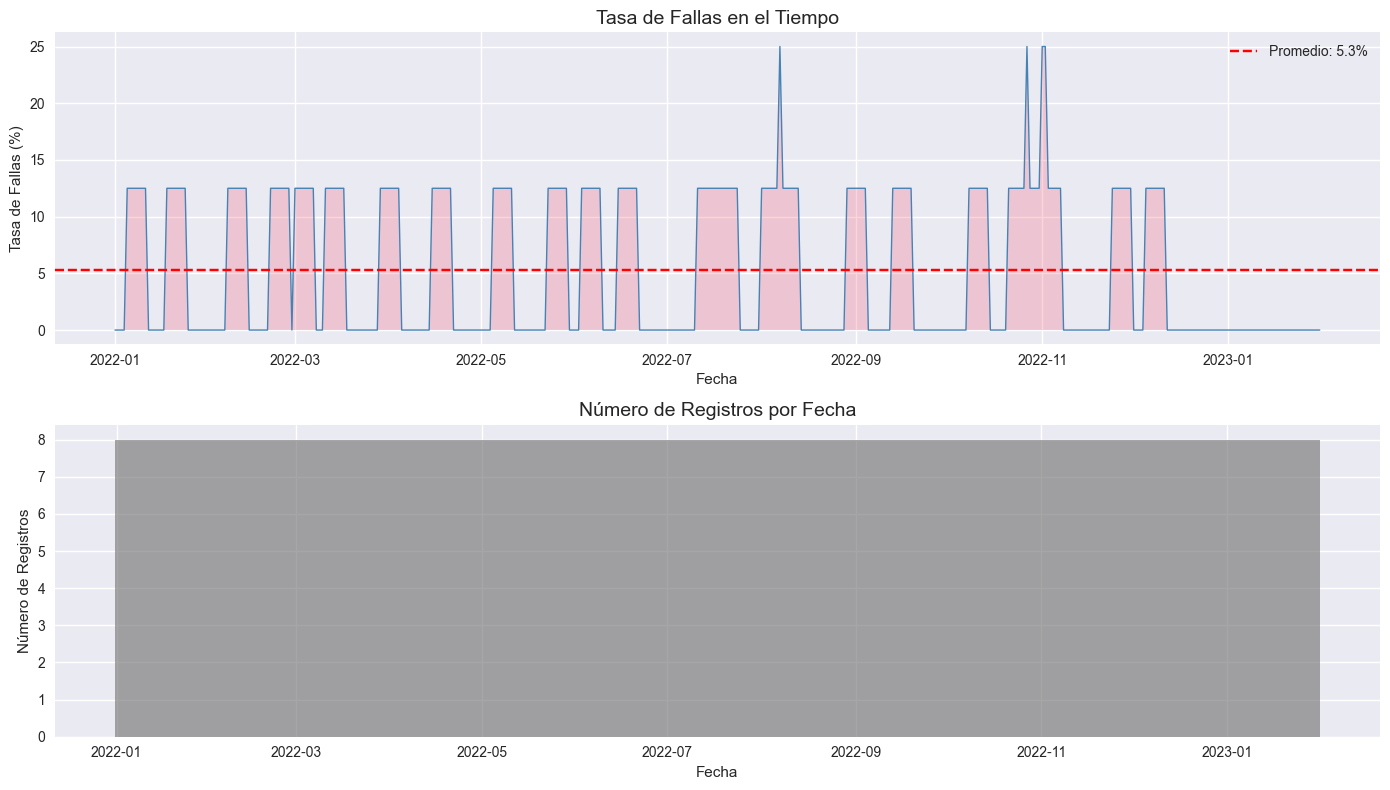


Resumen Temporal:
  Rango de fechas: 2022-01-01 00:00:00 a 2023-01-31 00:00:00
  Días totales: 395


In [27]:
if 'reading_date' in df.columns:
    # Convertir a datetime si es necesario
    df['reading_date'] = pd.to_datetime(df['reading_date'])
    
    # Fallas por fecha
    fallas_por_fecha = df.groupby('reading_date')['faliure'].agg(['sum', 'count', 'mean'])
    fallas_por_fecha.columns = ['total_fallas', 'registros', 'tasa_fallas']
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 8))
    
    # Tasa de fallas en el tiempo
    axes[0].plot(fallas_por_fecha.index, fallas_por_fecha['tasa_fallas'] * 100, 
                 color='steelblue', linewidth=1)
    axes[0].fill_between(fallas_por_fecha.index, fallas_por_fecha['tasa_fallas'] * 100, 
                         alpha=0.3)
    axes[0].set_title('Tasa de Fallas en el Tiempo', fontsize=14)
    axes[0].set_xlabel('Fecha')
    axes[0].set_ylabel('Tasa de Fallas (%)')
    axes[0].axhline(y=df['faliure'].mean()*100, color='red', linestyle='--', 
                    label=f'Promedio: {df["faliure"].mean()*100:.1f}%')
    axes[0].legend()
    
    # Número de registros por fecha
    axes[1].bar(fallas_por_fecha.index, fallas_por_fecha['registros'], 
                color='gray', alpha=0.7, width=1)
    axes[1].set_title('Número de Registros por Fecha', fontsize=14)
    axes[1].set_xlabel('Fecha')
    axes[1].set_ylabel('Número de Registros')
    
    plt.tight_layout()
    plt.show()
    
    # Resumen temporal
    print("\nResumen Temporal:")
    print(f"  Rango de fechas: {df['reading_date'].min()} a {df['reading_date'].max()}")
    print(f"  Días totales: {(df['reading_date'].max() - df['reading_date'].min()).days}")

## 12. Análisis de Activos

In [28]:
if 'asset_id' in df.columns:
    # Estadísticas por activo
    stats_por_activo = df.groupby('asset_id').agg({
        'faliure': ['count', 'sum', 'mean'],
        'asset_age_days': 'mean' if 'asset_age_days' in df.columns else 'count'
    }).round(2)
    stats_por_activo.columns = ['registros', 'total_fallas', 'tasa_fallas', 'edad_promedio']
    stats_por_activo['tasa_fallas'] = stats_por_activo['tasa_fallas'] * 100
    
    print("Estadísticas por Activo:")
    display(stats_por_activo)
    
    # Visualización
    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(stats_por_activo))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, stats_por_activo['registros'], width, 
                   label='Registros', color='steelblue')
    ax2 = ax.twinx()
    bars2 = ax2.bar(x + width/2, stats_por_activo['tasa_fallas'], width, 
                    label='Tasa Fallas (%)', color='coral')
    
    ax.set_xlabel('Asset ID')
    ax.set_ylabel('Número de Registros', color='steelblue')
    ax2.set_ylabel('Tasa de Fallas (%)', color='coral')
    ax.set_xticks(x)
    ax.set_xticklabels(stats_por_activo.index)
    ax.set_title('Registros y Tasa de Fallas por Activo', fontsize=14)
    
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    plt.tight_layout()
    plt.show()

KeyError: "Column(s) ['asset_age_days'] do not exist"

## 13. Detección de Outliers

In [ ]:
# Identificar outliers usando IQR
def detectar_outliers_iqr(df, columnas):
    outliers_info = []
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        if len(outliers) > 0:
            outliers_info.append({
                'Variable': col,
                'Num_Outliers': len(outliers),
                'Porcentaje': round(len(outliers)/len(df)*100, 2),
                'Min_Outlier': outliers.min(),
                'Max_Outlier': outliers.max()
            })
    return pd.DataFrame(outliers_info).sort_values('Num_Outliers', ascending=False)

outliers_df = detectar_outliers_iqr(df, numeric_cols)
print("Variables con Outliers (método IQR):")
display(outliers_df.head(15))

## 14. Resumen y Hallazgos Clave

In [ ]:
print("="*70)
print("RESUMEN DEL ANÁLISIS EXPLORATORIO")
print("="*70)

print("\n📊 DATASET:")
print(f"   - Total de registros: {len(df):,}")
print(f"   - Total de variables: {len(df.columns)}")
print(f"   - Variables numéricas: {len(numeric_cols)}")

if 'asset_id' in df.columns:
    print(f"   - Activos únicos: {df['asset_id'].nunique()}")

if 'reading_date' in df.columns:
    print(f"   - Rango temporal: {df['reading_date'].min().date()} a {df['reading_date'].max().date()}")

print("\n🎯 VARIABLE OBJETIVO (faliure):")
if 'faliure' in df.columns:
    print(f"   - Tasa de fallas: {df['faliure'].mean()*100:.2f}%")
    print(f"   - Desbalance de clases: {(df['faliure']==0).sum()}:{(df['faliure']==1).sum()}")

print("\n📈 TOP 5 PREDICTORES (por correlación):")
for i, (var, corr) in enumerate(correlations.head(5).items(), 1):
    direction = "↑" if corr > 0 else "↓"
    print(f"   {i}. {var}: {corr:.4f} {direction}")

print("\n💡 INSIGHTS CLAVE:")
if 'days_since_last_failure' in correlations.index:
    print(f"   - 'days_since_last_failure' es un fuerte predictor (menos días = más riesgo)")
if 'failure_count_365d' in correlations.index:
    print(f"   - El historial de fallas es relevante para predecir futuras fallas")
print(f"   - El dataset está desbalanceado, considerar técnicas como SMOTE o class_weight")

print("\n" + "="*70)

## Próximos Pasos

Basado en este análisis exploratorio, los siguientes pasos recomendados son:

1. **Preprocesamiento**:
   - Manejar valores faltantes
   - Tratar outliers según el contexto del negocio
   - Escalar variables numéricas

2. **Selección de Características**:
   - Usar las variables más correlacionadas con `faliure`
   - Considerar eliminar variables redundantes (alta correlación entre sí)

3. **Modelado**:
   - Aplicar técnicas para desbalance de clases
   - Ver notebooks: `02_modelos_clasificacion.ipynb`, `04_lightgbm_introduccion.ipynb`, `05_lightgbm_prediccion_fallas.ipynb`

4. **Evaluación**:
   - Usar métricas apropiadas para clases desbalanceadas (F1, AUC-ROC, Recall)
   - Ver notebook: `03_metricas_evaluacion.ipynb`